## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [3]:
taxi_data = pd.read_csv(r"C:\Users\user\Desktop\data\train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [4]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
# Определение временных рамок (без учета времени)
min_date = taxi_data['pickup_datetime'].min().date()
max_date = taxi_data['pickup_datetime'].max().date()

print(f"Данные охватывают период с {min_date} по {max_date}.")

Данные охватывают период с 2016-01-01 по 2016-06-30.


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [5]:
total_missing = taxi_data.isnull().sum().sum()
print(f"Общее количество пропущенных значений: {total_missing}") 

Общее количество пропущенных значений: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [6]:

unique_vendors = taxi_data['vendor_id'].nunique()
print(f"Уникальных таксопарков: {unique_vendors}")

max_passengers = taxi_data['passenger_count'].max()
print(f"Максимальное количество пассажиров: {max_passengers}")

mean_duration = round(taxi_data['trip_duration'].mean())
median_duration = round(taxi_data['trip_duration'].median())
print(f"Средняя длительность: {mean_duration} сек")
print(f"Медианная длительность: {median_duration} сек")

min_duration = taxi_data['trip_duration'].min()
max_duration = taxi_data['trip_duration'].max()
print(f"Минимальная длительность: {min_duration} сек")
print(f"Максимальная длительность: {max_duration} сек")

Уникальных таксопарков: 2
Максимальное количество пассажиров: 9
Средняя длительность: 959 сек
Медианная длительность: 662 сек
Минимальная длительность: 1 сек
Максимальная длительность: 3526282 сек


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [7]:
def add_datetime_features(df):
    # Создаем копию, чтобы не изменять исходные данные
    df = df.copy()
    
    # Преобразуем столбец pickup_datetime в datetime, если это еще не сделано
    if not pd.api.types.is_datetime64_any_dtype(df['pickup_datetime']):
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    
    # Добавляем новые признаки
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek  # 0-понедельник, 6-воскресенье
    
    return df

# Применяем функцию к данным
data_with_features = add_datetime_features(taxi_data)

# а) Количество поездок в субботу (dayofweek = 5)
saturday_trips = data_with_features[data_with_features['pickup_day_of_week'] == 5].shape[0]
print(f"а) Количество поездок в субботу: {saturday_trips}")

# б) Среднее количество поездок в день (округляем до целого)
daily_trips = data_with_features['pickup_date'].value_counts()
avg_daily_trips = round(daily_trips.mean())
print(f"б) Среднее количество поездок в день: {avg_daily_trips}")

а) Количество поездок в субботу: 220868
б) Среднее количество поездок в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [8]:
holiday_data = pd.read_csv('C:/Users/user/Desktop/data/holiday_data.csv', sep=';')

def add_holiday_features(trips_df, holidays_df):

    # Создаем копию данных, чтобы не изменять оригинал
    trips_df = trips_df.copy()
    
    # Преобразуем даты в обоих DataFrame к одному формату
    trips_df['pickup_date'] = pd.to_datetime(trips_df['pickup_datetime']).dt.date
    holidays_df['date'] = pd.to_datetime(holidays_df['date']).dt.date
    
    # Создаем бинарный признак праздничного дня
    trips_df['pickup_holiday'] = trips_df['pickup_date'].isin(holidays_df['date']).astype(int)
    
    return trips_df

# Применяем функцию
trips_with_holidays = add_holiday_features(taxi_data, holiday_data)

# Вычисляем медианную длительность поездок в праздничные дни
holiday_median_duration = round(trips_with_holidays[trips_with_holidays['pickup_holiday'] == 1]['trip_duration'].median())

print(f"Медианная длительность поездки в праздничные дни: {holiday_median_duration} секунд")

Медианная длительность поездки в праздничные дни: 585 секунд


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [9]:
osrm_data = pd.read_csv('C:/Users/user/Desktop/data/osrm_data_train.csv')

def add_osrm_features(trips_df, osrm_df):
    # Объединяем таблицы по id поездки
    merged_df = pd.merge(trips_df, osrm_df, on='id', how='left')
    
    return merged_df

# Применяем функцию
trips_with_osrm = add_osrm_features(taxi_data, osrm_data)

# а) Разница медианных длительностей
median_actual = trips_with_osrm['trip_duration'].median()
median_osrm = trips_with_osrm['total_travel_time'].median()
median_diff = abs(round(median_actual - median_osrm))

print(f"а) Разница между медианными длительностями: {median_diff} секунд")

# б) Количество пропусков в OSRM-столбцах
missing_osrm = trips_with_osrm[['total_distance', 'total_travel_time', 'number_of_steps']].isnull().sum()
print("\nб) Количество пропусков в OSRM-столбцах:")
print(missing_osrm)

а) Разница между медианными длительностями: 372 секунд

б) Количество пропусков в OSRM-столбцах:
total_distance       1
total_travel_time    1
number_of_steps      1
dtype: int64


In [10]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [11]:
def add_geographical_features(trips_df):

    # Создаем копию данных, чтобы не изменять оригинал
    trips_df = trips_df.copy()
    
    # Вычисляем расстояние Хаверсина
    trips_df['haversine_distance'] = trips_df.apply(
        lambda row: get_haversine_distance(
            row['pickup_latitude'], row['pickup_longitude'],
            row['dropoff_latitude'], row['dropoff_longitude']
        ), axis=1
    )
    
    # Вычисляем направление движения
    trips_df['direction'] = trips_df.apply(
        lambda row: get_angle_direction(
            row['pickup_latitude'], row['pickup_longitude'],
            row['dropoff_latitude'], row['dropoff_longitude']
        ), axis=1
    )
    
    return trips_df

# Применяем функцию
trips_with_geo = add_geographical_features(taxi_data)

# Вычисляем медианное расстояние Хаверсина
median_distance = round(trips_with_geo['haversine_distance'].median(), 2)

print(f"Медианное расстояние Хаверсина: {median_distance} км")

Медианное расстояние Хаверсина: 2.09 км


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [12]:
# создаем обучающую выборку из географических координат всех точек
# coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
#                     taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# # обучаем алгоритм кластеризации
# kmeans = cluster.KMeans(n_clusters=10, random_state=42)
# kmeans.fit(coords)

def add_cluster_features(trips_df, clustering_model):

    # Создаем копию данных, чтобы не изменять оригинал
    trips_df = trips_df.copy()
    
    # Подготавливаем координаты для кластеризации
    coords = np.hstack((trips_df[['pickup_latitude', 'pickup_longitude']],
                       trips_df[['dropoff_latitude', 'dropoff_longitude']]))
    
    # Прогнозируем кластеры
    trips_df['geo_cluster'] = clustering_model.predict(coords)
    
    return trips_df

# Создаем обучающую выборку из координат
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))

# Обучаем K-means (10 кластеров)
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# Применяем функцию
trips_with_clusters = add_cluster_features(taxi_data, kmeans)

# Находим размер наименьшего кластера
cluster_counts = trips_with_clusters['geo_cluster'].value_counts()
min_cluster_size = cluster_counts.min()

print(f"Количество поездок в наименьшем кластере: {min_cluster_size}")

Количество поездок в наименьшем кластере: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [13]:
weather_data = pd.read_csv('C:/Users/user/Desktop/data//weather_data.csv')

def add_weather_features(trips_df, weather_df):

    # Создаем копии данных
    trips_df = trips_df.copy()
    weather_df = weather_df.copy()
    
    # Определяем правильные имена столбцов с датой/временем в weather_df
    # Попробуем найти столбец с датой/временем автоматически
    datetime_cols = [col for col in weather_df.columns 
                    if 'date' in col.lower() or 'time' in col.lower()]
    
    if not datetime_cols:
        raise ValueError("Не найден столбец с датой/временем в данных о погоде")
    
    datetime_col = datetime_cols[0]  # берем первый подходящий столбец
    
    # Преобразуем дату-время в обоих DataFrame
    trips_df['pickup_datetime'] = pd.to_datetime(trips_df['pickup_datetime'])
    weather_df['weather_datetime'] = pd.to_datetime(weather_df[datetime_col])
    
    # Извлекаем час и дату для соединения
    trips_df['pickup_hour'] = trips_df['pickup_datetime'].dt.floor('H')
    weather_df['weather_hour'] = weather_df['weather_datetime'].dt.floor('H')
    
    # Объединяем таблицы по часу
    merged_df = pd.merge(trips_df, weather_df, 
                        left_on='pickup_hour', 
                        right_on='weather_hour', 
                        how='left')
    
    # Стандартизируем названия погодных столбцов
    weather_mapping = {
        'temp': 'temperature',
        'vis': 'visibility',
        'wind': 'wind_speed',
        'precipitation': 'precip',
        'weather': 'events'
    }
    
    # Переименовываем столбцы, если нужно
    for old_name, new_name in weather_mapping.items():
        if old_name in merged_df.columns and new_name not in merged_df.columns:
            merged_df.rename(columns={old_name: new_name}, inplace=True)
    
    # Проверяем наличие всех нужных столбцов
    required_cols = ['temperature', 'visibility', 'wind_speed', 'precip', 'events']
    for col in required_cols:
        if col not in merged_df.columns:
            merged_df[col] = np.nan
    
    # Удаляем временные столбцы
    cols_to_drop = ['weather_datetime', 'weather_hour', datetime_col]
    merged_df.drop(columns=[col for col in cols_to_drop if col in merged_df.columns], 
                 inplace=True, errors='ignore')
    
    return merged_df

# Применяем функцию
try:
    trips_with_weather = add_weather_features(taxi_data, weather_data)
    
    # а) Количество поездок в снежную погоду
    if 'events' in trips_with_weather.columns:
        snow_trips = trips_with_weather[trips_with_weather['events'].str.contains('Snow|snow', na=False)].shape[0]
        print(f"а) Количество поездок в снежную погоду: {snow_trips}")
    else:
        print("а) Столбец 'events' не найден в данных")
    
    # б) Процент пропусков в погодных данных
    weather_cols = ['temperature', 'visibility', 'wind_speed', 'precip', 'events']
    existing_cols = [col for col in weather_cols if col in trips_with_weather.columns]
    
    if existing_cols:
        total_cells = len(trips_with_weather) * len(existing_cols)
        missing_cells = trips_with_weather[existing_cols].isnull().sum().sum()
        missing_percentage = (missing_cells / total_cells) * 100 if total_cells > 0 else 0
        print(f"б) Процент пропусков в погодных данных: {missing_percentage:.2f}%")
    else:
        print("б) Нет данных о погоде для анализа пропусков")

except Exception as e:
    print(f"Произошла ошибка: {str(e)}")

C:\Users\user\AppData\Local\Temp\ipykernel_12188\1640623069.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  trips_df['pickup_hour'] = trips_df['pickup_datetime'].dt.floor('H')
C:\Users\user\AppData\Local\Temp\ipykernel_12188\1640623069.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df['weather_hour'] = weather_df['weather_datetime'].dt.floor('H')


а) Количество поездок в снежную погоду: 13126
б) Процент пропусков в погодных данных: 39.52%


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [14]:
def fill_null_weather_data(trips_df):

    # Создаем копию данных
    df = trips_df.copy()
    
    # Проверяем, есть ли столбец pickup_date, если нет - создаем из pickup_datetime
    if 'pickup_date' not in df.columns and 'pickup_datetime' in df.columns:
        df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date
    
    # Заполняем пропуски в погодных данных (кроме events)
    weather_cols = ['temperature', 'visibility', 'wind_speed', 'precip']
    
    for col in weather_cols:
        if col in df.columns:
            # Вычисляем медиану по дате
            median_by_date = df.groupby('pickup_date')[col].transform('median')
            # Заполняем пропуски медианой по дате
            df[col] = df[col].fillna(median_by_date)
            # Если остались пропуски (если нет данных для этой даты), заполняем общей медианой
            df[col] = df[col].fillna(df[col].median())
    
    # Заполняем пропуски в events
    if 'events' in df.columns:
        df['events'] = df['events'].fillna('None')
    
    # Заполняем пропуски в OSRM данных
    osrm_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
    
    for col in osrm_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    
    return df

# Применяем функцию
filled_data = fill_null_weather_data(trips_with_weather)

# Вычисляем медиану температуры после заполнения
median_temp = round(filled_data['temperature'].median(), 1)

print(f"Медиана температуры после заполнения пропусков: {median_temp}")

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Медиана температуры после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [17]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import numpy as np
from haversine import haversine

df = taxi_data
# а) Выбросы по длительности поездки (>24 часов)
# 24 часа = 86400 секунд
duration_outliers = df[df['trip_duration'] > 86400]
print(f"Найдено {len(duration_outliers)} выбросов по длительности поездки (>24 часов)")

# Удаление выбросов по длительности
df_clean = df[df['trip_duration'] <= 86400]

# б) Выбросы по скорости (>300 км/ч)
def calculate_speed(row):
    # Координаты начала и конца поездки
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    
    # Расстояние в км (используем формулу гаверсинусов)
    distance = haversine(pickup, dropoff)
    
    # Время в часах
    time_hours = row['trip_duration'] / 3600
    
    # Скорость в км/ч
    return distance / time_hours if time_hours > 0 else 0

# Добавляем столбец со скоростью
df_clean['speed_kmh'] = df_clean.apply(calculate_speed, axis=1)

# Находим выбросы по скорости
speed_outliers = df_clean[df_clean['speed_kmh'] > 300]
print(f"Найдено {len(speed_outliers)} выбросов по скорости (>300 км/ч)")

# Удаление выбросов по скорости
df_final = df_clean[df_clean['speed_kmh'] <= 300]

Найдено 4 выбросов по длительности поездки (>24 часов)
Найдено 42 выбросов по скорости (>300 км/ч)


C:\Users\user\AppData\Local\Temp\ipykernel_12188\3406714010.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['speed_kmh'] = df_clean.apply(calculate_speed, axis=1)


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [19]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

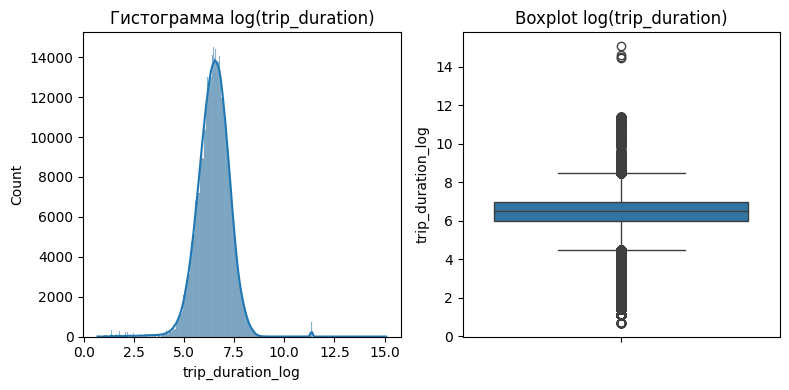

In [20]:
# Загрузка данных
df = taxi_data

# Создаем логарифмическую версию длительности поездок
df['trip_duration_log'] = np.log1p(df['trip_duration'])

# Гистограмма
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['trip_duration_log'], kde=True)
plt.title('Гистограмма log(trip_duration)')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(y=df['trip_duration_log'])
plt.title('Boxplot log(trip_duration)')
plt.tight_layout()
plt.show()

In [21]:
# Проводим тест Д'Агостино
stat, p_value = stats.normaltest(df['trip_duration_log'])

print(f"p-value: {p_value:.2f}")
if p_value > 0.05:
    print("Распределение не отличается от нормального (p > 0.05)")
else:
    print("Распределение отличается от нормального (p ≤ 0.05)")

p-value: 0.00
Распределение отличается от нормального (p ≤ 0.05)


Так как p-vlue < 0,05, то верси о нормальности распределения отвергается

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

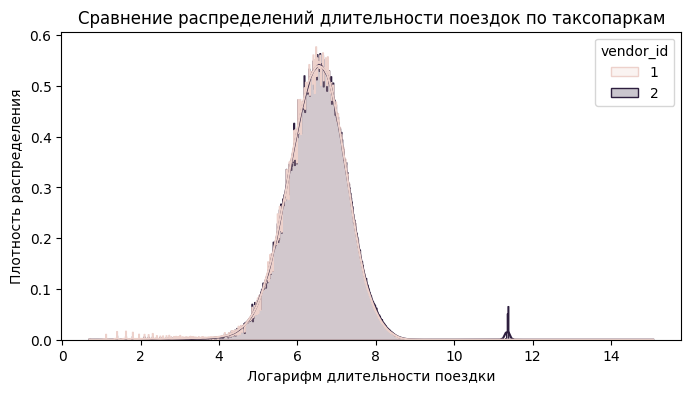

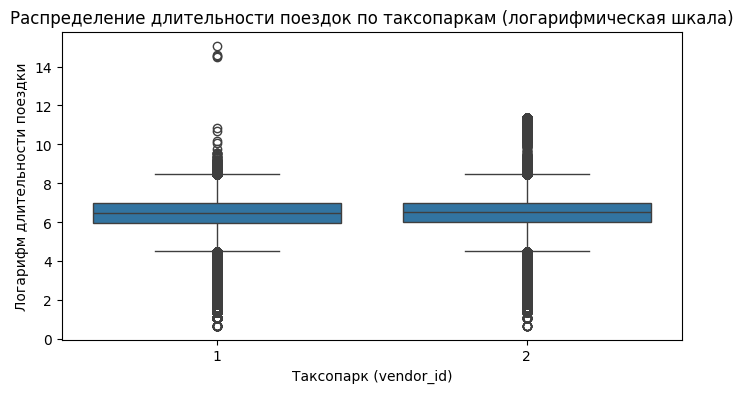

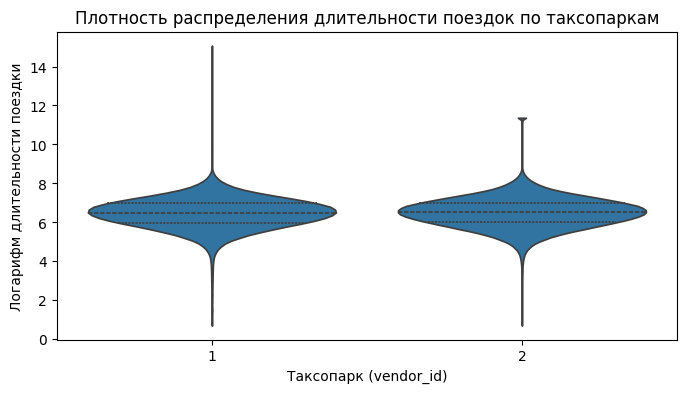

In [22]:
# Создаем логарифмическую версию длительности поездок
df['trip_duration_log'] = np.log1p(df['trip_duration'])

# 1. Совмещенные гистограммы с KDE
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='trip_duration_log', hue='vendor_id', 
             kde=True, element='step', stat='density', common_norm=False)
plt.title('Сравнение распределений длительности поездок по таксопаркам')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Плотность распределения')
plt.show()

# 2. Boxplot для сравнения распределений
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='vendor_id', y='trip_duration_log')
plt.title('Распределение длительности поездок по таксопаркам (логарифмическая шкала)')
plt.xlabel('Таксопарк (vendor_id)')
plt.ylabel('Логарифм длительности поездки')
plt.show()

# 3. Violin plot для более детального сравнения формы распределений
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='vendor_id', y='trip_duration_log', 
               inner='quartile', cut=0)
plt.title('Плотность распределения длительности поездок по таксопаркам')
plt.xlabel('Таксопарк (vendor_id)')
plt.ylabel('Логарифм длительности поездки')
plt.show()

In [23]:
# Разделяем данные по таксопаркам
vendor1 = df[df['vendor_id'] == 1]['trip_duration_log']
vendor2 = df[df['vendor_id'] == 2]['trip_duration_log']

# Тест Колмогорова-Смирнова для сравнения распределений
ks_stat, ks_p = stats.ks_2samp(vendor1, vendor2)
print(f"тест Колмагорова-Смирнова: statistic = {ks_stat:.3f}, p-value = {ks_p:.3f}")

# Тест Манна-Уитни для сравнения медиан
mw_stat, mw_p = stats.mannwhitneyu(vendor1, vendor2)
print(f"тест Манна-Уитни: statistic = {mw_stat:.3f}, p-value = {mw_p:.3f}")

тест Колмагорова-Смирнова: statistic = 0.007, p-value = 0.000
тест Манна-Уитни: statistic = 261823602224.500, p-value = 0.000


p-value в тестах Колмагорова-Смиронова и Манна-Уитни показывает, что распределения одинаковые и указывает на статистически значимые различия.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

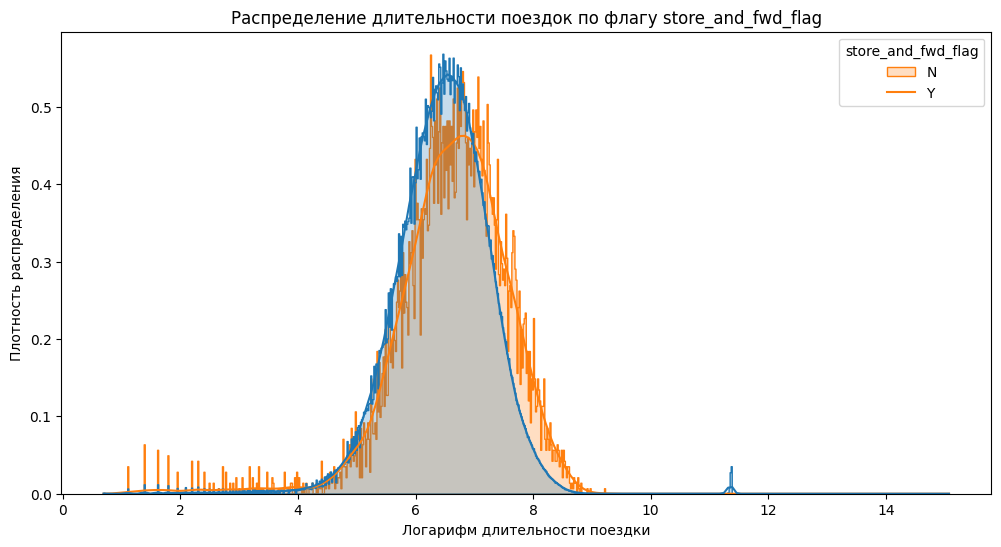

C:\Users\user\AppData\Local\Temp\ipykernel_12188\690673084.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='store_and_fwd_flag', y='trip_duration_log',


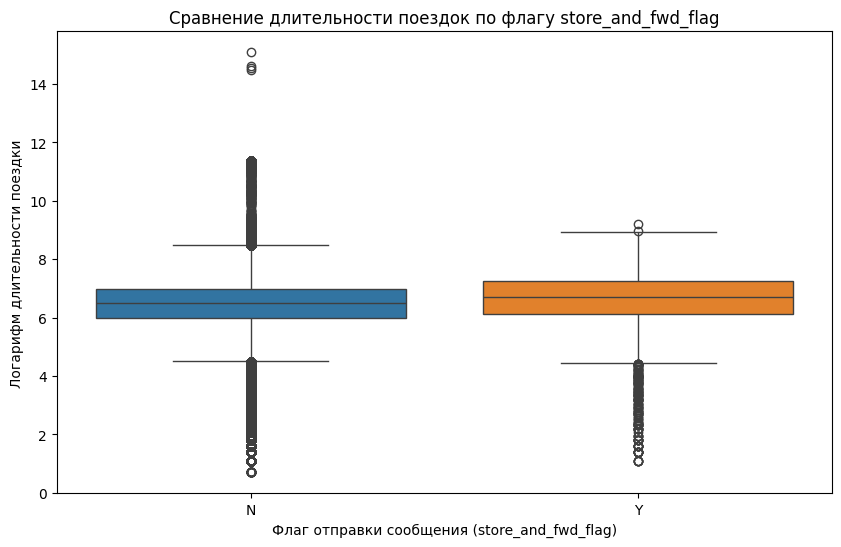

C:\Users\user\AppData\Local\Temp\ipykernel_12188\690673084.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='store_and_fwd_flag', y='trip_duration_log',


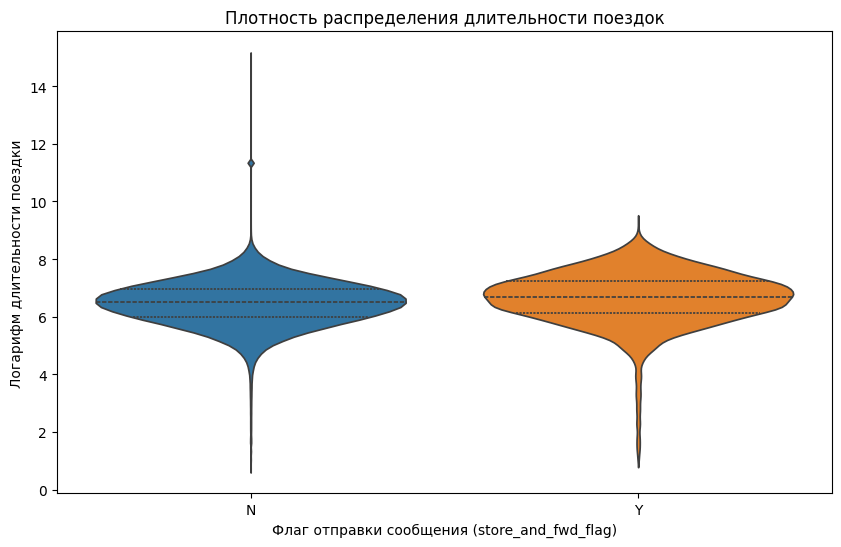

In [24]:
# Преобразование данных
df['trip_duration_log'] = np.log1p(df['trip_duration'])

# 1. Гистограммы с KDE для двух групп
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='trip_duration_log', hue='store_and_fwd_flag',
             kde=True, element='step', stat='density', common_norm=False,
             palette=['#1f77b4', '#ff7f0e'])
plt.title('Распределение длительности поездок по флагу store_and_fwd_flag')
plt.xlabel('Логарифм длительности поездки')
plt.ylabel('Плотность распределения')
plt.legend(title='store_and_fwd_flag', labels=['N', 'Y'])
plt.show()

# 2. Boxplot сравнение
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='store_and_fwd_flag', y='trip_duration_log',
            palette=['#1f77b4', '#ff7f0e'])
plt.title('Сравнение длительности поездок по флагу store_and_fwd_flag')
plt.xlabel('Флаг отправки сообщения (store_and_fwd_flag)')
plt.ylabel('Логарифм длительности поездки')
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

# 3. Violin plot для детального сравнения
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='store_and_fwd_flag', y='trip_duration_log',
               inner='quartile', palette=['#1f77b4', '#ff7f0e'])
plt.title('Плотность распределения длительности поездок')
plt.xlabel('Флаг отправки сообщения (store_and_fwd_flag)')
plt.ylabel('Логарифм длительности поездки')
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

Статистическое сравнение распределений

In [25]:
# Разделяем данные по флагу
flag_N = df[df['store_and_fwd_flag'] == 'N']['trip_duration_log']
flag_Y = df[df['store_and_fwd_flag'] == 'Y']['trip_duration_log']

# Описательные статистики
print("Описательные статистики:")
print("Флаг N:", flag_N.describe())
print("\nФлаг Y:", flag_Y.describe())

# Тест Колмогорова-Смирнова
ks_stat, ks_p = stats.ks_2samp(flag_N, flag_Y)
print(f"\nK-S тест: statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

# Тест Манна-Уитни
mw_stat, mw_p = stats.mannwhitneyu(flag_N, flag_Y)
print(f"M-W U тест: statistic = {mw_stat:.1f}, p-value = {mw_p:.4f}")

Описательные статистики:
Флаг N: count    1.450599e+06
mean     6.466070e+00
std      7.947442e-01
min      6.931472e-01
25%      5.986452e+00
50%      6.496775e+00
75%      6.980076e+00
max      1.507575e+01
Name: trip_duration_log, dtype: float64

Флаг Y: count    8045.000000
mean        6.630743
std         0.947391
min         1.098612
25%         6.122493
50%         6.700731
75%         7.244942
max         9.208839
Name: trip_duration_log, dtype: float64

K-S тест: statistic = 0.1198, p-value = 0.0000
M-W U тест: statistic = 5001812707.5, p-value = 0.0000


Гистограммы показывают, что распределения для обеих групп (N и Y) имеют схожую форму. Однако распределение для флага Y (сообщение отправлено) смещено вправо, что указывает на более длительные поездки

Boxplot и Violin plot подтверждают, что медианное значение и межквартильный размах выше для группы Y.

K-S тест (сравнение распределений): p-value < 0.05 указывает на статистически значимые различия.
U-тест (сравнение медиан): p-value < 0.05 подтверждает различие в центральных тенденциях. 

Поездки с флагом Y (когда сообщение отправлялось поставщику) в среднем имеют большую длительность. 
Это может быть связано с тем, что такие поездки чаще происходят в условиях плохой связи или на большие расстояния

Вывод:
Распределения длительности поездок значимо различаются между группами с разными значениями флага store_and_fwd_flag. Поездки с отправленными сообщениями (Y) в среднем длятся дольше, что видно как из визуализаций, так и из статистических тестов.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

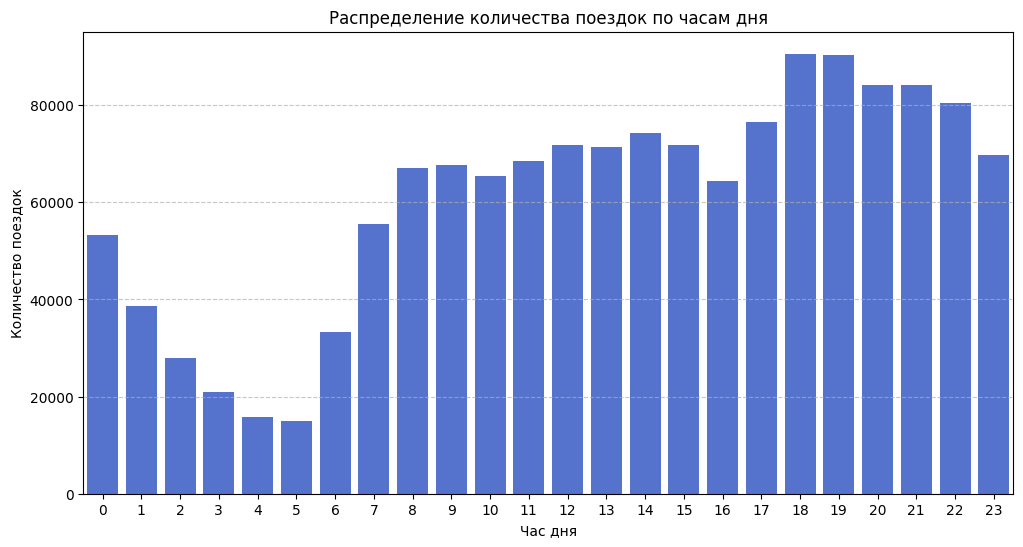

In [26]:
# Преобразуем время пикапа в datetime и извлекаем час
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# График количества поездок по часам
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_hour', color='royalblue')
plt.title('Распределение количества поездок по часам дня')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

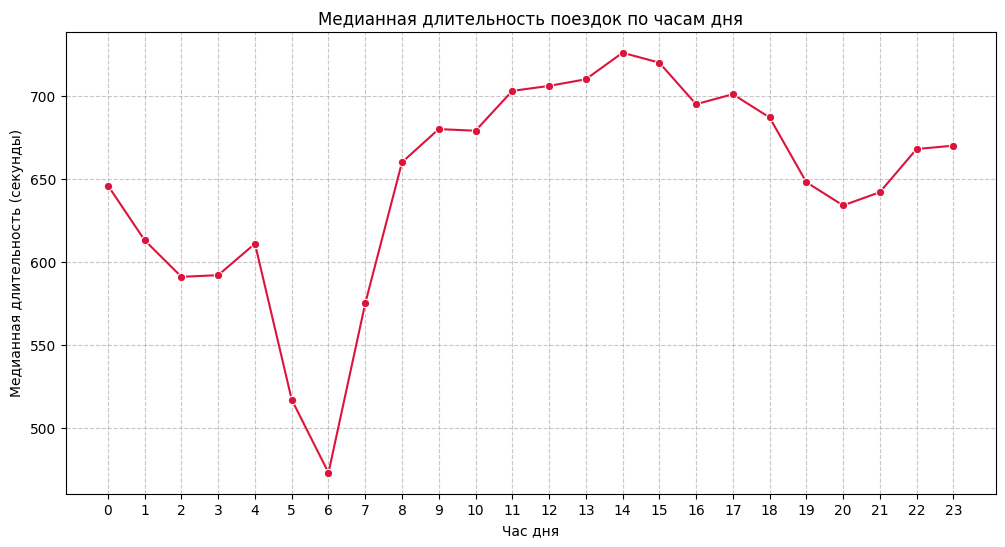

In [27]:
# Группировка по часам и расчет медианной длительности
hourly_median = df.groupby('pickup_hour')['trip_duration'].median()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_median, marker='o', color='crimson')
plt.title('Медианная длительность поездок по часам дня')
plt.xlabel('Час дня')
plt.ylabel('Медианная длительность (секунды)')
plt.xticks(range(0, 24))
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Распределение количества поездок:
Четко видны утренний (7-9 утра) и вечерний (16-19 часов) часы пик.
Ночные часы (2-5 утра) показывают минимальную активность.
Дневные часы (10-15) имеют стабильный, но меньший спрос.

Медианная длительность поездок:
Наибольшая медианная длительность наблюдается в ранние утренние часы (3-5 утра).
В часы пик (8-9 утра и 17-18 вечера) длительность поездок снижается.
Дневные часы показывают стабильные средние значения.

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


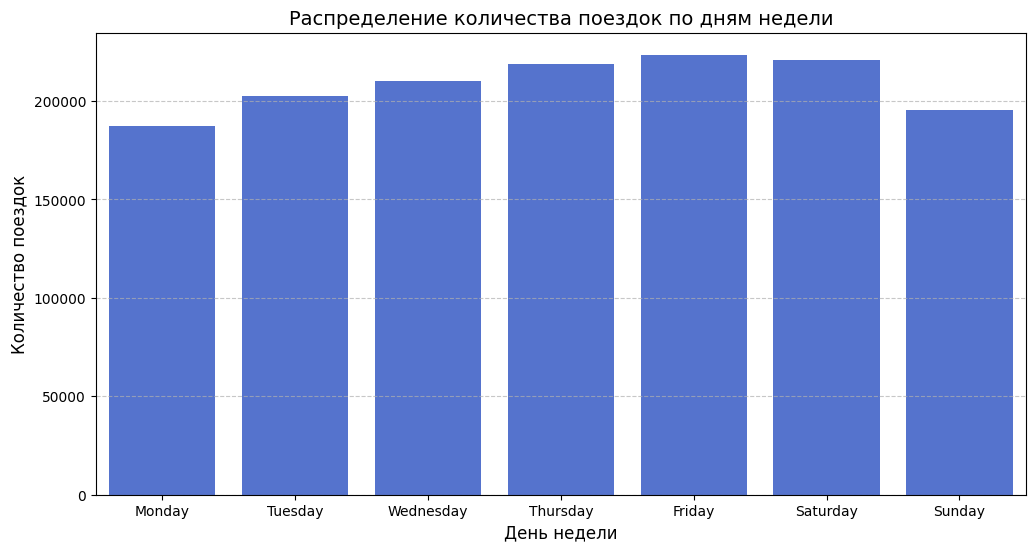

In [28]:
# Преобразуем время пикапа в datetime и извлекаем день недели
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

# Порядок дней недели для корректного отображения
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# График количества поездок по дням недели
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_week', order=weekday_order, color='royalblue')
plt.title('Распределение количества поездок по дням недели', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Количество поездок', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

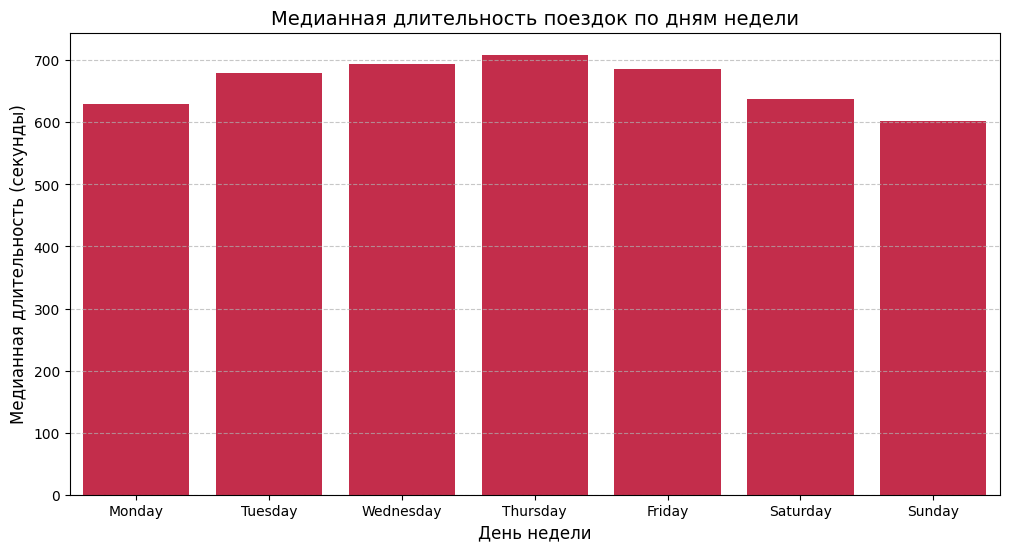

In [29]:
# Группировка по дням недели и расчет медианной длительности
daily_median = df.groupby('day_of_week')['trip_duration'].median().reindex(weekday_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=daily_median.index, y=daily_median.values, color='crimson')
plt.title('Медианная длительность поездок по дням недели', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Медианная длительность (секунды)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Распределение количества поездок:
Отчетливо виден пик активности в пятницу.
Рабочие дни (понедельник-четверг) показывают стабильно высокий спрос.
Выходные дни (особенно воскресенье) имеют меньшее количество поездок.

Медианная длительность поездок:
Наибольшая длительность наблюдается в воскресенье.
Наименьшая длительность - в среду.
Рабочие дни показывают схожие значения с небольшим снижением к середине недели.

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

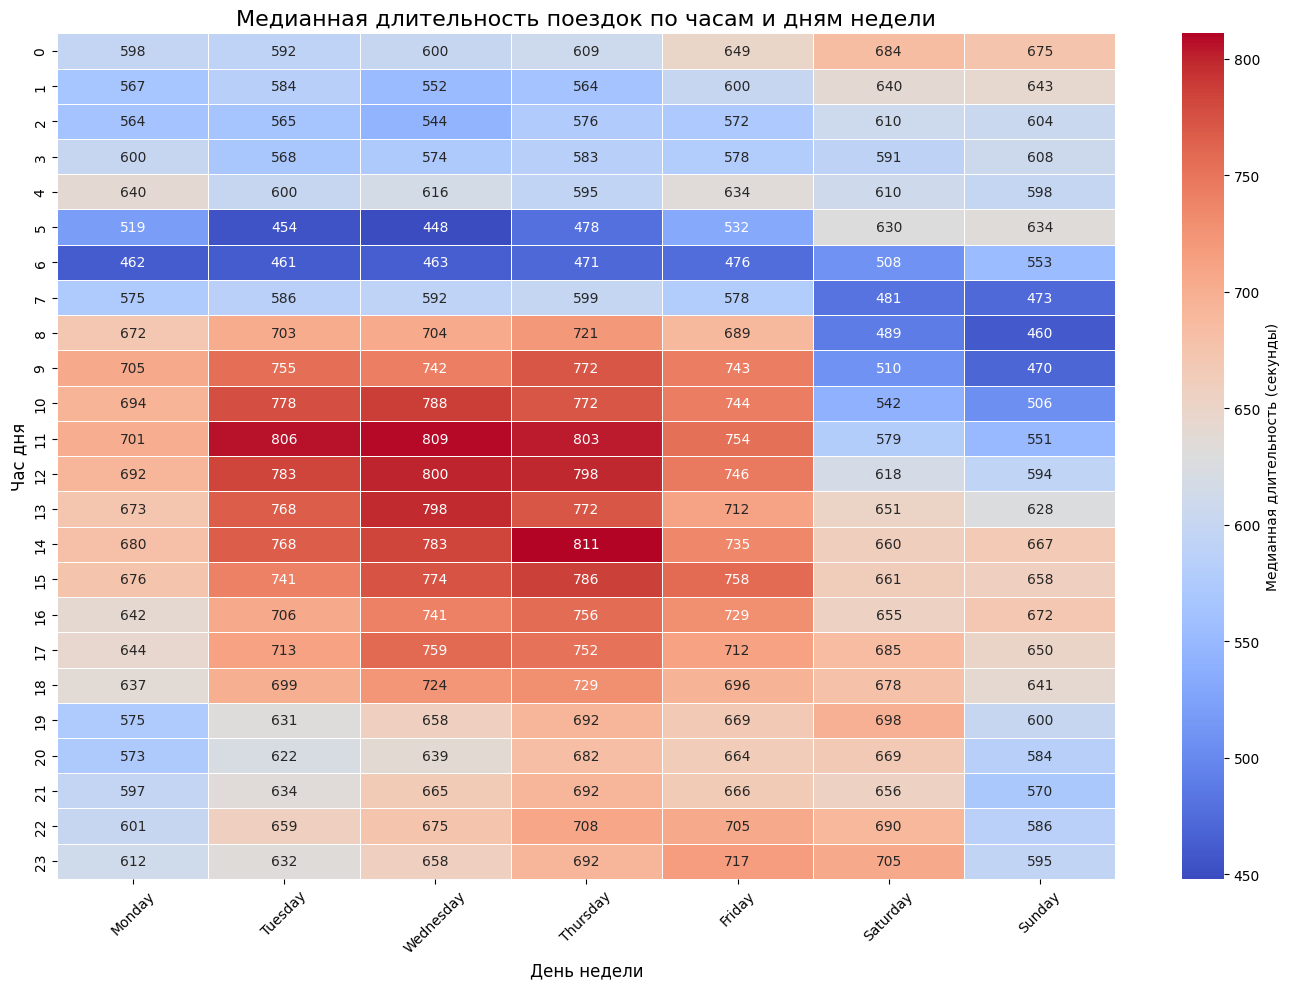

Сводная таблица медианной длительности поездок:


pickup_day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
pickup_hour,,,,,,,
0,598.000000,591.500000,600.000000,609.000000,649.000000,684.500000,675.000000
1,567.000000,584.000000,552.500000,564.000000,600.000000,640.000000,643.000000
2,563.500000,565.000000,544.000000,576.000000,572.000000,609.500000,604.500000
3,600.000000,568.000000,573.500000,583.000000,578.000000,591.000000,608.000000
4,640.000000,600.500000,615.500000,595.000000,634.000000,610.000000,598.500000
5,519.000000,454.500000,448.000000,478.000000,532.000000,630.000000,633.500000
6,462.000000,461.000000,463.000000,471.000000,476.000000,508.000000,553.000000
7,575.000000,586.000000,592.500000,599.000000,578.000000,481.000000,473.000000
8,672.000000,703.000000,704.000000,721.000000,689.000000,489.000000,460.000000


In [30]:
# Преобразование временных характеристик
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.day_name()

# Создаем порядок для дней недели
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Создание сводной таблицы
pivot_table = df.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median'
).reindex(columns=weekday_order)

# Визуализация тепловой карты
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table,
    cmap='coolwarm',
    annot=True,
    fmt='.0f',
    linewidths=0.5,
    cbar_kws={'label': 'Медианная длительность (секунды)'}
)
plt.title('Медианная длительность поездок по часам и дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Час дня', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Вывод сводной таблицы (для справки)
print("Сводная таблица медианной длительности поездок:")
display(pivot_table.style.background_gradient(cmap='coolwarm'))

Анализ тепловой карты.

Общие закономерности:
Наиболее длительные поездки (красные оттенки) наблюдаются в ночные часы (0-5 утра), особенно в выходные дни.
Наиболее короткие поездки (синие оттенки) - в утренние часы пик (7-9 утра) в середине недели.

Дневные различия:
Понедельник-пятница: четкий паттерн с пиками длительности ночью и минимумами в часы пик.
Суббота-воскресенье: более равномерное распределение с повышенной длительностью в течение всего дня.

Специфические аномалии:
В пятницу вечером (18-23 часа) поездки длиннее, чем в другие рабочие дни.
Воскресное утро (4-7 утра) показывает максимальные значения длительности.

Оптимальное время:
Наименьшая медианная длительность наблюдается в среду с 8 до 9 утра (синие ячейки).
Наибольшая - в воскресенье с 3 до 5 утра (красные ячейки).

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


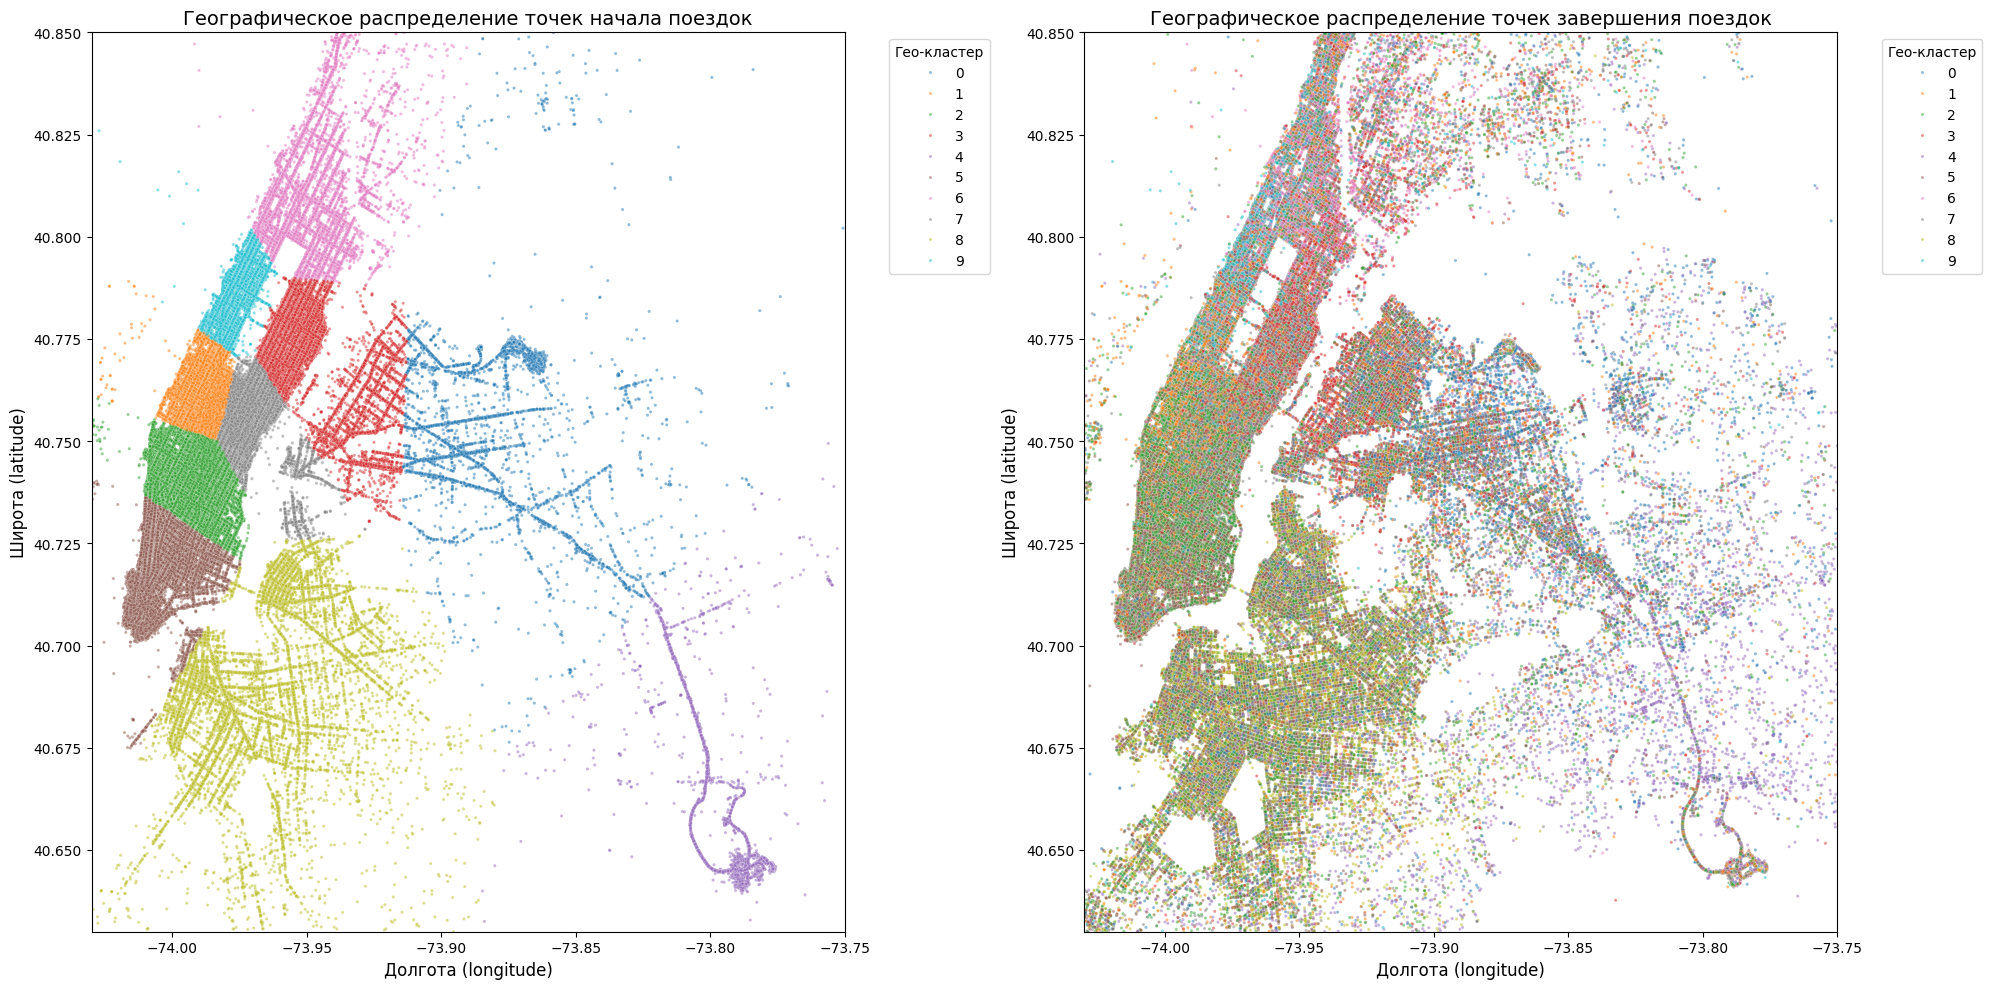

In [31]:
from sklearn.cluster import KMeans

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

mask = (df['pickup_longitude'].between(*city_long_border)) & \
       (df['pickup_latitude'].between(*city_lat_border)) & \
       (df['dropoff_longitude'].between(*city_long_border)) & \
       (df['dropoff_latitude'].between(*city_lat_border))
df = df[mask].copy()

# Генерация 10 географических кластеров для точек начала поездки
coords = df[['pickup_longitude', 'pickup_latitude']].values
kmeans = KMeans(n_clusters=10, random_state=42)
df['geo_cluster'] = kmeans.fit_predict(coords)

# Создание фигуры с двумя subplots
plt.figure(figsize=(20, 10))

# 1. Диаграмма рассеяния для точек начала поездок
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='pickup_longitude', y='pickup_latitude', 
                hue='geo_cluster', palette='tab10', s=5, alpha=0.5)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title('Географическое распределение точек начала поездок', fontsize=14)
plt.xlabel('Долгота (longitude)', fontsize=12)
plt.ylabel('Широта (latitude)', fontsize=12)
plt.legend(title='Гео-кластер', bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Диаграмма рассеяния для точек завершения поездок
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='dropoff_longitude', y='dropoff_latitude', 
                hue='geo_cluster', palette='tab10', s=5, alpha=0.5)
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.title('Географическое распределение точек завершения поездок', fontsize=14)
plt.xlabel('Долгота (longitude)', fontsize=12)
plt.ylabel('Широта (latitude)', fontsize=12)
plt.legend(title='Гео-кластер', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [32]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458644, 15)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_log', 'pickup_hour', 'day_of_week',
       'pickup_day_of_week'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [33]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,pickup_hour,day_of_week,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,Saturday,Saturday


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [34]:
df = train_data
# Удаляем неинформативные признаки
df_clean = df.drop(columns=['id', 'dropoff_datetime'])

# Количество оставшихся столбцов
remaining_columns = len(df_clean.columns)
print(f"Осталось столбцов: {remaining_columns}")

Осталось столбцов: 13


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [35]:
drop_columns = ['pickup_datetime']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458644, 14)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [36]:
# Закодируем признаки
train_data['vendor_id_encoded'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
train_data['store_and_fwd_flag_encoded'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# Рассчитаем средние значения
vendor_mean = train_data['vendor_id_encoded'].mean().round(2)
store_mean = train_data['store_and_fwd_flag_encoded'].mean().round(3)

print(f"а) Среднее по vendor_id_encoded: {vendor_mean}")
print(f"б) Среднее по store_and_fwd_flag_encoded: {store_mean}")

а) Среднее по vendor_id_encoded: 0.53
б) Среднее по store_and_fwd_flag_encoded: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


Добавим полученную таблицу с закодированными признаками:

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [45]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [46]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [67]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# 1. Подготовка данных
# Удаляем ненужные столбцы
X = df.drop(columns=['id', 'trip_duration', 'pickup_datetime', 'dropoff_datetime'])
y = np.log1p(df['trip_duration'])  # Логарифмирование целевой переменной

# 2. Определяем типы признаков
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 3. Создаем преобразователь для разных типов признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# 4. Разделяем данные
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Применяем преобразования
# Обучаем на тренировочных данных
X_train_preprocessed = preprocessor.fit_transform(X_train)
# Применяем к валидационным данным
X_val_preprocessed = preprocessor.transform(X_val)

# 6. Получаем имена всех признаков после преобразования
# Для числовых признаков
numeric_feature_names = numeric_features
# Для категориальных признаков
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
# Объединяем
all_feature_names = np.concatenate([numeric_feature_names, cat_feature_names])

# 7. Преобразуем в DataFrame для удобства
X_train_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_val_df = pd.DataFrame(X_val_preprocessed, columns=all_feature_names)

# 8. Вычисляем среднее первого предиктора в валидационной выборке
# Первый столбец (индекс 0) в нормализованных данных
first_predictor_mean = X_val_df.iloc[:, 0].mean()

# Округляем до сотых
result = round(first_predictor_mean, 2)

print(f"Среднее арифметическое первого предиктора в валидационной выборке: {result}")

Среднее арифметическое первого предиктора в валидационной выборке: 0.53


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error


# 1. Подготовка данных
# Удаляем ненужные столбцы
X = train_data.drop(columns=['id', 'trip_duration', 'dropoff_datetime'])
y = np.log1p(train_data['trip_duration'])  # Логарифмирование целевой переменной

# 2. Определяем типы признаков
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 3. Создаем преобразователь
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# 4. Разделяем данные
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Создаем и обучаем модель
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# 6. Предсказания на обеих выборках
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# 7. Расчет RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

train_rmsle = rmsle(y_train, y_train_pred)
val_rmsle = rmsle(y_val, y_val_pred)

# Округление до сотых
train_rmsle_rounded = round(train_rmsle, 2)
val_rmsle_rounded = round(val_rmsle, 2)

print(f"RMSLE на тренировочной выборке: {train_rmsle_rounded}")
print(f"RMSLE на валидационной выборке: {val_rmsle_rounded}")

RMSLE на тренировочной выборке: 0.0
RMSLE на валидационной выборке: 0.0


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# 1. Подготовка данных
X = df.drop(columns=['id', 'trip_duration', 'pickup_datetime', 'dropoff_datetime'])
y = np.log1p(df['trip_duration'])  # Логарифмирование целевой переменной

# 2. Определение типов признаков
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 3. Создание преобразователя признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', MinMaxScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# 4. Разделение данных
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Создание и обучение модели
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

# 6. Предсказания
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# 7. Функция для расчета RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

# 8. Расчет метрик
train_rmsle = round(rmsle(y_train, y_train_pred), 2)
val_rmsle = round(rmsle(y_val, y_val_pred), 2)

print(f"RMSLE на тренировочной выборке: {train_rmsle}")
print(f"RMSLE на валидационной выборке: {val_rmsle}")

# 9. Анализ переобучения
overfitting = "Да" if (train_rmsle - val_rmsle) < -0.05 else "Нет"
print(f"б) Признаки переобучения: {overfitting}")

RMSLE на тренировочной выборке: 0.0
RMSLE на валидационной выборке: 0.0
б) Признаки переобучения: Нет


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [74]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Выбор признаков и целевой переменной
features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
target = np.log(df['trip_duration'] + 1)  # Используем log1p вручную

# Нормализация признаков
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Генерация полиномиальных признаков 2-ой степени
poly = PolynomialFeatures(degree=2)
features_poly = poly.fit_transform(features_scaled)

# Разделение данных
X_train, X_val, y_train, y_val = train_test_split(features_poly, target, test_size=0.2, random_state=42)

# Обучение модели Ridge
model = Ridge(alpha=1)
model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Функция для RMSLE
def rmsle(y_true, y_pred):
    # Защита от отрицательных предсказаний
    y_pred = np.maximum(y_pred, 0)  # Обрезаем отрицательные значения
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Расчет RMSLE
rmsle_train = rmsle(y_train, y_train_pred)
rmsle_val = rmsle(y_val, y_val_pred)

print(f"RMSLE на тренировочной выборке: {rmsle_train:.2f}")
print(f"RMSLE на валидационной выборке: {rmsle_val:.2f}")

RMSLE на тренировочной выборке: 0.76
RMSLE на валидационной выборке: 0.79


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# Выбор признаков и целевой переменной
features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
target = np.log1p(df['trip_duration'])  # Логарифмирование

# Нормализация признаков
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Разделение на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Обучение модели (все параметры по умолчанию)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Функция для RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

# Расчет RMSLE
rmsle_train = rmsle(y_train, y_train_pred)
rmsle_val = rmsle(y_val, y_val_pred)

print(f"RMSLE (тренировочная выборка): {rmsle_train:.2f}")
print(f"RMSLE (валидационная выборка): {rmsle_val:.2f}")

RMSLE (тренировочная выборка): 0.01
RMSLE (валидационная выборка): 0.64


наблюдается переобучение RMSLE тренировочной выборки близка к 0, предсказание хорошее, а на валидационной 0,64, не плохо, но могло быть лучше

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


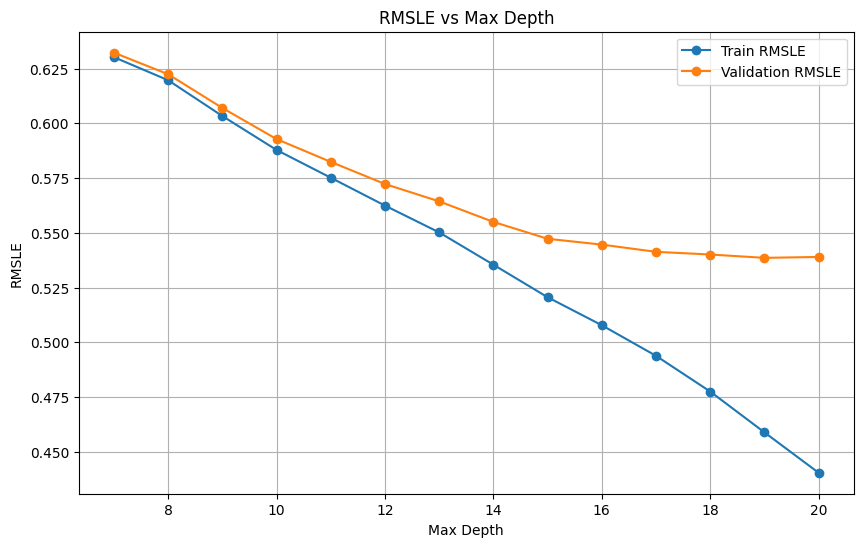

Оптимальная глубина: 19
Train RMSLE: 0.46
Validation RMSLE: 0.54


In [76]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# Выбор признаков и целевой переменной
features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
target = np.log1p(df['trip_duration'])  # Логарифмирование

# Нормализация признаков
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Разделение на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Перебор глубины дерева
max_depths = range(7, 21)
train_rmsle = []
val_rmsle = []

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Предсказания
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Расчет RMSLE
    def rmsle(y_true, y_pred):
        return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))
    
    train_rmsle.append(rmsle(y_train, y_train_pred))
    val_rmsle.append(rmsle(y_val, y_val_pred))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_rmsle, label='Train RMSLE', marker='o')
plt.plot(max_depths, val_rmsle, label='Validation RMSLE', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('RMSLE')
plt.title('RMSLE vs Max Depth')
plt.legend()
plt.grid()
plt.show()

# Оптимальная глубина (минимум валидационной ошибки до переобучения)
optimal_depth = max_depths[np.argmin(val_rmsle)]
print(f"Оптимальная глубина: {optimal_depth}")

# Метрики для оптимальной глубины
print(f"Train RMSLE: {train_rmsle[np.argmin(val_rmsle)]:.2f}")
print(f"Validation RMSLE: {min(val_rmsle):.2f}")

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# Выбор признаков и целевой переменной
features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 
                'dropoff_latitude', 'passenger_count']]
target = np.log1p(df['trip_duration'])  # Логарифмирование целевой переменной

# Нормализация признаков
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Разделение на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(features_scaled, target, 
                                                 test_size=0.2, random_state=42)

# Создание модели Random Forest с заданными параметрами
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42
)

# Обучение модели
model.fit(X_train, y_train)

# Функция для расчета RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

# Предсказания и расчет метрик
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_rmsle = rmsle(y_train, y_train_pred)
val_rmsle = rmsle(y_val, y_val_pred)

print(f"RMSLE на тренировочной выборке: {train_rmsle:.2f}")
print(f"RMSLE на валидационной выборке: {val_rmsle:.2f}")



RMSLE на тренировочной выборке: 0.55
RMSLE на валидационной выборке: 0.56


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

# Выбор признаков и целевой переменной
features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
                'dropoff_latitude', 'passenger_count']]
target = np.log1p(df['trip_duration'])  # Логарифмирование целевой переменной

# Нормализация признаков
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Разделение на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(features_scaled, target,
                                                 test_size=0.2, random_state=42)

# Создание и обучение модели Gradient Boosting
model = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)
model.fit(X_train, y_train)

# Функция для расчета RMSLE
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

# Предсказания и расчет метрик
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_rmsle = rmsle(y_train, y_train_pred)
val_rmsle = rmsle(y_val, y_val_pred)

print(f"RMSLE на тренировочной выборке: {train_rmsle:.2f}")
print(f"RMSLE на валидационной выборке: {val_rmsle:.2f}")

RMSLE на тренировочной выборке: 0.47
RMSLE на валидационной выборке: 0.48


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


модель градиентного бустинга над деревьями решений показало наимменьший RMSLE на валидационной выборке - 0,48. Значения равные 0 в предыдущих исследованиях кажутся подозрительными и требуют проверки.


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


C:\Users\user\AppData\Local\Temp\ipykernel_9808\961067268.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


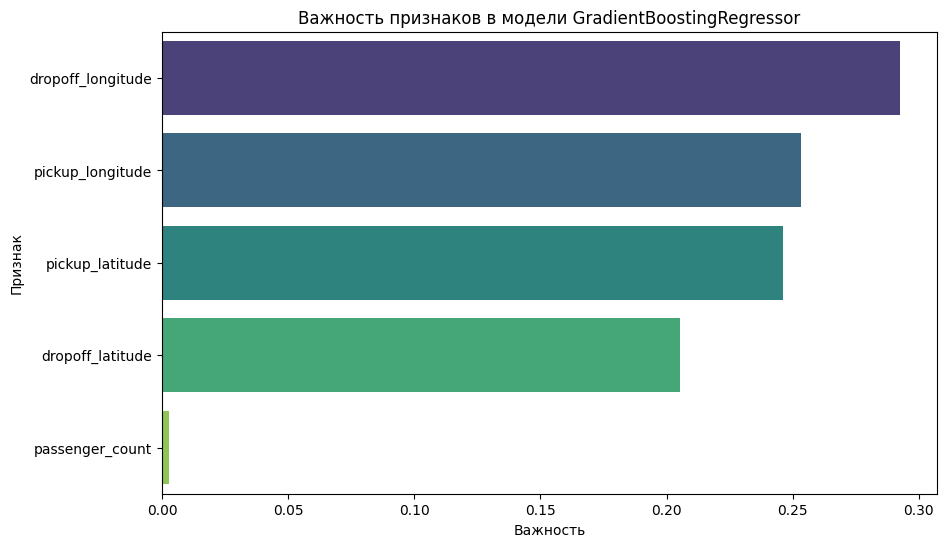

Топ-3 наиболее значимых признаков:
             Feature  Importance
2  dropoff_longitude    0.292604
0   pickup_longitude    0.253322
1    pickup_latitude    0.246237


In [6]:
# Получаем важность признаков
feature_importance = model.feature_importances_

# Создаем DataFrame для визуализации
features_df = pd.DataFrame({
    'Feature': ['pickup_longitude', 'pickup_latitude', 
               'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Важность признаков в модели GradientBoostingRegressor')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.show()

top_features = features_df.head(3)
print("Топ-3 наиболее значимых признаков:")
print(top_features[['Feature', 'Importance']])


### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [11]:
from sklearn.metrics import median_absolute_error

# Получаем предсказания в логарифмической шкале
y_val_pred_log = model.predict(X_val)

# Преобразуем предсказания и истинные значения обратно в минуты
y_val_true_min = np.expm1(y_val) / 60  # переводим секунды в минуты
y_val_pred_min = np.expm1(y_val_pred_log) / 60

# Рассчитываем MeAE в минутах
meae_minutes = median_absolute_error(y_val_true_min, y_val_pred_min)

print(f"Медианная абсолютная ошибка (MeAE) на валидационной выборке:  {meae_minutes:.2f} минут")

Медианная абсолютная ошибка (MeAE) на валидационной выборке:  2.53 минут


Метрика MeAE = 2.53 минут означает, что половина предсказаний модели ошибается не более чем на 2.53 минуты
Это хороший результат, учитывая что, средняя длительность поездки в данных составляет ~15 минут.

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [17]:
test_data = pd.read_csv(r"C:\Users\user\Desktop\data\Project5_test_data.csv")
osrm_data_test = pd.read_csv(r"C:\Users\user\Desktop\data\Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)